
<h2> Practice: Training a KNN model </h2>

In [1]:
from sklearn.datasets import load_digits

dataset=load_digits()

target=dataset.target
data=dataset.data
image=dataset.images

In [2]:
data.shape

(1797, 64)

In [3]:
target.shape

(1797,)

In [4]:
image.shape

(1797, 8, 8)

8


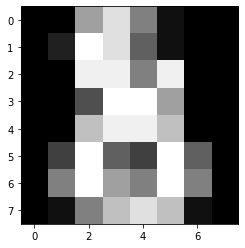

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
i=1796
plt.imshow(image[i],cmap="gray")
print(target[i])

In [4]:
from sklearn.datasets import load_digits
dataset=load_digits()
target=dataset.target
data=dataset.data
image=dataset.images
data.shape

(1797, 64)

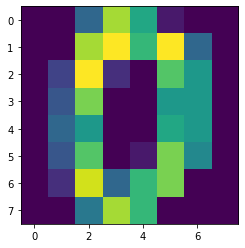

In [7]:
plt.imshow(data[0].reshape(8,8))

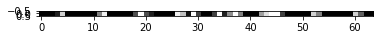

In [8]:
plt.imshow(data[100].reshape(1,64),cmap="gray")

<h3> Trying to load breast cancer dataset from toy data sets </h3>

(569,)
(569, 30)
['malignant' 'benign']
1


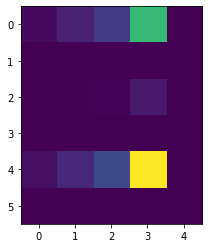

In [9]:
from sklearn.datasets import load_breast_cancer
ds=load_breast_cancer()

print(ds.target.shape)
#print(ds.images)
print(ds.data.shape)
print(ds.target_names)
plt.imshow(ds.data[568].reshape(6,5))
print(ds.target[568])

# Back to Hand written digits

In [10]:
image[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
from sklearn.model_selection import train_test_split
result=train_test_split(data,target,test_size=0.2)

train_data=result[0]
test_data=result[1]
train_target=result[2]
test_target=result[3]

In [6]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(
    data,target,test_size=0.2)

In [14]:
train_data

array([[ 0.,  0.,  4., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  7.,  0.,  0.],
       [ 0.,  0.,  3., ..., 13.,  4.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  9., ...,  6.,  0.,  0.],
       [ 0.,  0.,  0., ..., 12.,  0.,  0.]])

In [15]:
train_target

array([1, 8, 6, ..., 4, 5, 6])

In [16]:
test_data

array([[ 0.,  0.,  4., ...,  7.,  0.,  0.],
       [ 0.,  0.,  0., ...,  8.,  0.,  0.],
       [ 0.,  0.,  9., ..., 11.,  1.,  0.],
       ...,
       [ 0.,  2., 15., ..., 12.,  7.,  0.],
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  6., ...,  0.,  0.,  0.]])

In [17]:
test_target

array([0, 1, 8, 1, 2, 1, 4, 7, 2, 6, 9, 5, 7, 9, 5, 2, 5, 5, 9, 6, 0, 4,
       6, 1, 0, 5, 2, 2, 3, 5, 1, 6, 9, 1, 6, 5, 6, 0, 8, 8, 0, 7, 0, 2,
       8, 3, 4, 6, 5, 5, 4, 3, 0, 0, 9, 0, 7, 3, 9, 3, 7, 2, 9, 6, 5, 9,
       9, 4, 7, 8, 2, 5, 0, 5, 3, 9, 5, 0, 5, 9, 3, 0, 3, 6, 0, 4, 3, 5,
       6, 2, 6, 4, 9, 3, 0, 6, 9, 2, 5, 4, 4, 5, 6, 9, 6, 8, 7, 8, 8, 2,
       0, 7, 4, 8, 9, 9, 2, 6, 5, 8, 5, 8, 9, 0, 2, 7, 3, 0, 7, 2, 1, 4,
       5, 9, 3, 4, 8, 9, 1, 9, 2, 7, 6, 1, 8, 1, 6, 6, 1, 9, 0, 1, 1, 7,
       5, 7, 7, 4, 8, 5, 6, 9, 6, 7, 6, 5, 2, 9, 6, 3, 1, 8, 8, 8, 1, 6,
       8, 8, 9, 1, 3, 5, 4, 3, 8, 6, 0, 1, 4, 2, 8, 2, 1, 5, 1, 7, 2, 7,
       5, 7, 8, 0, 2, 2, 6, 7, 9, 4, 5, 0, 2, 7, 2, 0, 6, 7, 5, 7, 4, 2,
       2, 7, 4, 4, 8, 9, 7, 1, 3, 5, 3, 5, 4, 8, 0, 8, 6, 6, 1, 7, 6, 5,
       1, 8, 5, 9, 5, 7, 5, 0, 4, 1, 8, 4, 5, 2, 2, 7, 7, 5, 0, 5, 9, 6,
       3, 0, 7, 9, 4, 9, 2, 1, 8, 9, 5, 2, 1, 3, 1, 4, 2, 7, 1, 8, 9, 1,
       4, 8, 9, 5, 9, 9, 7, 8, 1, 7, 1, 8, 7, 8, 0,

<h3> Importing the KNN algorithm from sklearn </h3>

In [2]:
from sklearn.neighbors import KNeighborsClassifier

#loading knn algorithm in model
m=KNeighborsClassifier(n_neighbors=4)

#train the model
m.fit(train_data,train_target)

NameError: name 'train_data' is not defined

In [19]:
test_data.shape

(360, 64)

In [20]:
train_data.shape

(1437, 64)

In [46]:
prediction = m.predict(test_data)

In [47]:
from sklearn.metrics import accuracy_score
x=accuracy_score(test_target,prediction)
print(x)
x*360
#only 2 are wrong

0.9833333333333333


354.0

In [10]:
i=int(input())
print(prediction[i])
print(test_target[i])

23
3
3


<h2> How to predict the most optimum value of n in KNN algorithm 
    using ELBOW METHOD<h2>

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [13]:
print(confusion_matrix(test_target,prediction))

[[44  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  1  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  2  0  0  0  0  0  0 33  0]
 [ 0  0  0  1  0  0  0  0  0 38]]


In [16]:
print(classification_report(test_target,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        24
           3       0.97      0.97      0.97        35
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        37
           7       0.98      1.00      0.99        41
           8       1.00      0.94      0.97        35
           9       1.00      0.97      0.99        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [20]:
import numpy as np
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(train_data,train_target)
 pred_i = knn.predict(test_data)
 error_rate.append(np.mean(pred_i != test_target))

Text(0, 0.5, 'Error Rate')

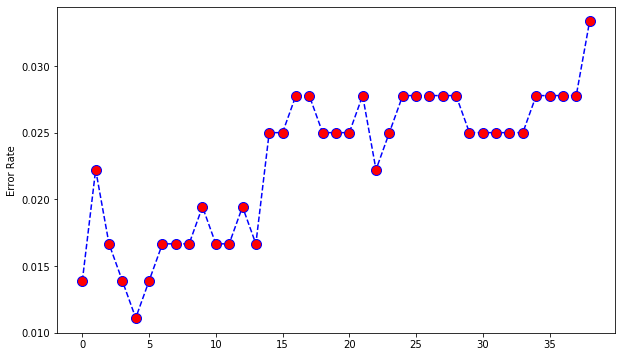

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(error_rate,color='blue',linestyle='--',
         marker='o',markerfacecolor='red',markersize=10)
plt.ylabel('Error Rate')

optimal k value is 4

In [43]:
from sklearn.neighbors import KNeighborsClassifier

#loading knn algorithm in model
m=KNeighborsClassifier(n_neighbors=4)
#train the model
m.fit(train_data,train_target)
prediction = m.predict(test_data)

In [44]:
print(classification_report(test_target,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        24
           3       0.97      0.97      0.97        35
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        37
           7       0.98      1.00      0.99        41
           8       1.00      0.91      0.96        35
           9       1.00      0.97      0.99        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

